In [13]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sample=r'/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg'
read_image= cv2.imread(sample,0)

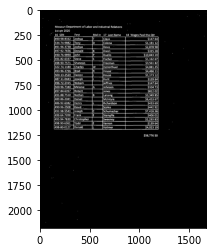

In [15]:
convert_bin,grey_scale = cv2.threshold(read_image,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
grey_scale = 255-grey_scale
grey_graph = plt.imshow(grey_scale,cmap='gray')
plt.show()

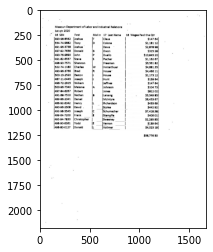

In [17]:
image = cv2.imread('/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

# Repair image
repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel, iterations=1)
plt.imshow(result)


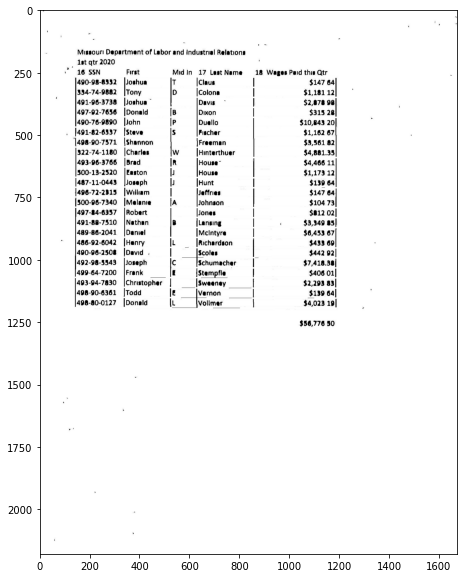

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(result)

In [30]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sample=r'/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg'
read_image= cv2.imread(sample,0)

convert_bin,grey_scale = cv2.threshold(read_image,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
grey_scale = 255-grey_scale
#grey_graph = plt.imshow(grey_scale,cmap='gray')
#plt.show()

length = np.array(read_image).shape[1]//100
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (length, 1))

horizontal_detect = cv2.erode(grey_scale, horizontal_kernel, iterations=3)
hor_line = cv2.dilate(horizontal_detect, horizontal_kernel, iterations=3)
#plotting = plt.imshow(horizontal_detect,cmap='gray')

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, length))
vertical_detect = cv2.erode(grey_scale, vertical_kernel, iterations=3)
ver_lines = cv2.dilate(vertical_detect, vertical_kernel, iterations=3)

final = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
combine = cv2.addWeighted(ver_lines, 0.5, hor_line, 0.5, 0.0)
combine = cv2.erode(~combine, final, iterations=2)
thresh, combine = cv2.threshold(combine,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
convert_xor = cv2.bitwise_xor(read_image,combine)
inverse = cv2.bitwise_not(convert_xor)

cont, _ = cv2.findContours(combine, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [31]:
def get_boxes(num, method="left-to-right"):
    reverse = False
    flag = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        flag = 1
    boxes = [cv2.boundingRect(c) for c in num]
    (num, boxes) = zip(*sorted(zip(num, boxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (num, boxes)
cont, boxes = get_boxes(cont, method="top-to-bottom")

NameError: name 'i' is not defined

In [38]:
import numpy


In [43]:
sample=r'/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg'
img= cv2.imread(sample,0)

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin

img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)

img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
eroded_image = cv2.erode(img, vertical_kernel, iterations=5)

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//150, 1))
image_2 = cv2.erode(img_bin, hor_kernel, iterations=5)

horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=5)

In [44]:
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)

In [45]:
thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
b_image = cv2.bitwise_not(cv2.bitwise_xor(img,vertical_horizontal_lines))

In [46]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [47]:
boundingBoxes = [cv2.boundingRect(c) for c in cnts]
(contours, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
key=lambda x:x[1][1]))

In [48]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        boxes.append([x,y,w,h])


In [49]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/2):
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
print("Rows")
for row in rows:
    print(row)

6.291666666666667


IndexError: list index out of range

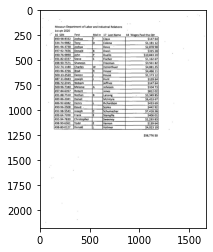

In [50]:
import cv2
import matplotlib.pyplot as plt
file=r'/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg'
img = cv2.imread(file,0)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

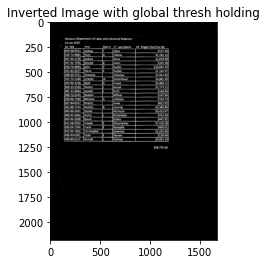

In [51]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

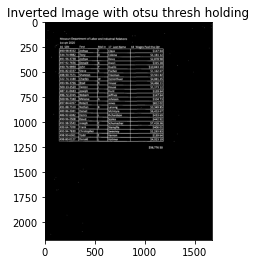

In [52]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

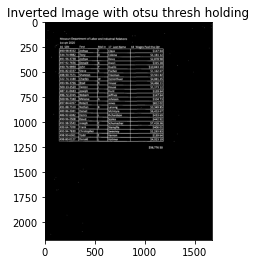

In [53]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [54]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


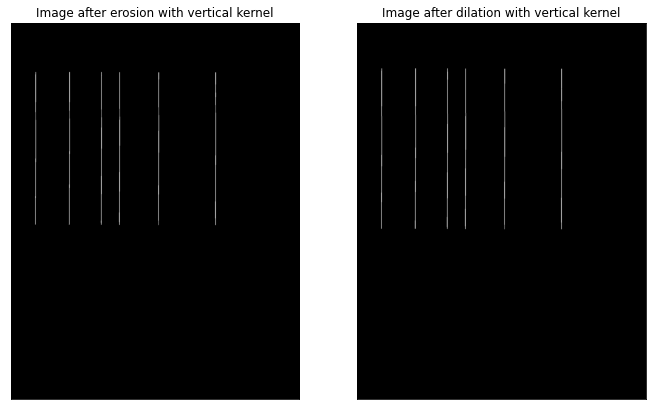

In [55]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()

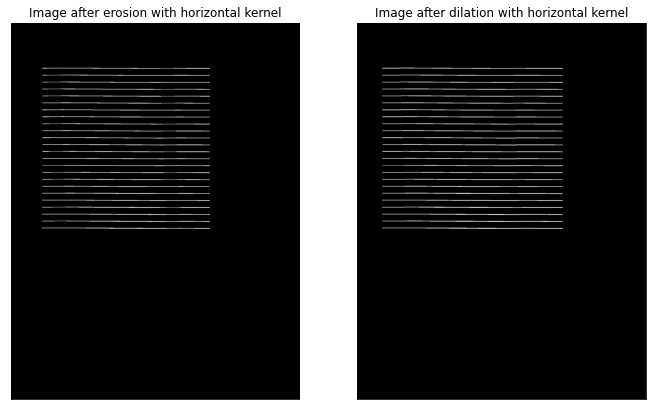

In [56]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

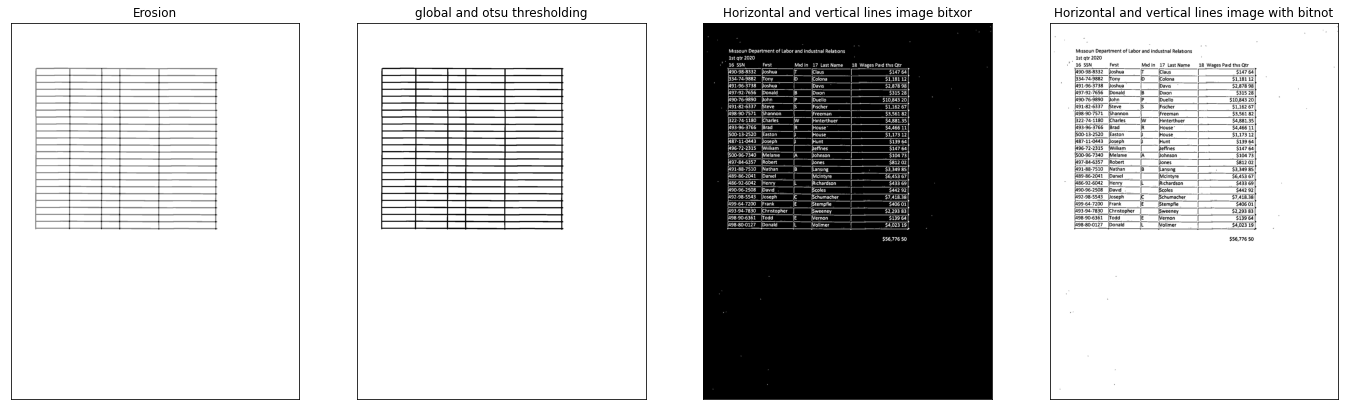

In [57]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [58]:
import pytesseract


In [59]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [60]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

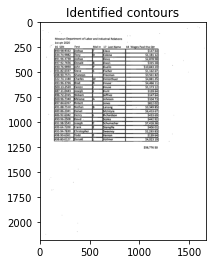

In [61]:
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [62]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
print("Rows")
for row in rows:
  print(row)

60.376068376068375
Rows
[[344, 271, 178, 35], [148, 271, 189, 35], [860, 272, 322, 35], [633, 272, 220, 35], [528, 272, 99, 34]]
[[344, 311, 178, 35], [148, 311, 189, 35], [528, 312, 99, 34], [860, 313, 322, 34], [633, 313, 220, 34]]
[[148, 351, 189, 35], [528, 352, 99, 35], [344, 352, 178, 34], [859, 353, 323, 35], [633, 353, 220, 34]]
[[148, 391, 189, 35], [344, 392, 178, 34], [859, 393, 323, 35], [633, 393, 220, 34], [528, 393, 99, 33]]
[[148, 431, 189, 35], [344, 432, 178, 34], [859, 433, 323, 35], [633, 433, 220, 35], [528, 433, 99, 34]]
[[343, 472, 179, 35], [147, 472, 190, 34], [859, 473, 324, 35], [633, 473, 220, 35], [528, 473, 99, 34]]
[[343, 512, 180, 34], [147, 512, 191, 34], [528, 513, 100, 34], [859, 514, 324, 34], [633, 514, 221, 34]]
[[344, 552, 179, 35], [148, 552, 190, 35], [529, 553, 98, 34], [860, 554, 323, 35], [634, 554, 220, 34]]
[[148, 592, 190, 35], [344, 593, 178, 34], [860, 594, 323, 35], [634, 594, 220, 35], [529, 594, 98, 34]]
[[344, 633, 178, 34], [148, 63

In [72]:
total_cells=0
for i in range(len(row)):
    if len(rows[i]) > total_cells:
        total_cells = len(rows[i])
print(total_cells)

5


In [73]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)

[242, 433, 1020, 743, 577]


In [74]:
center=np.array(center)
center.sort()
print(center)

[ 242  433  577  743 1020]


In [75]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
     print(box)

[[[148, 271, 189, 35]], [[344, 271, 178, 35]], [[528, 272, 99, 34]], [[633, 272, 220, 35]], [[860, 272, 322, 35]]]
[[[148, 311, 189, 35]], [[344, 311, 178, 35]], [[528, 312, 99, 34]], [[633, 313, 220, 34]], [[860, 313, 322, 34]]]
[[[148, 351, 189, 35]], [[344, 352, 178, 34]], [[528, 352, 99, 35]], [[633, 353, 220, 34]], [[859, 353, 323, 35]]]
[[[148, 391, 189, 35]], [[344, 392, 178, 34]], [[528, 393, 99, 33]], [[633, 393, 220, 34]], [[859, 393, 323, 35]]]
[[[148, 431, 189, 35]], [[344, 432, 178, 34]], [[528, 433, 99, 34]], [[633, 433, 220, 35]], [[859, 433, 323, 35]]]
[[[147, 472, 190, 34]], [[343, 472, 179, 35]], [[528, 473, 99, 34]], [[633, 473, 220, 35]], [[859, 473, 324, 35]]]
[[[147, 512, 191, 34]], [[343, 512, 180, 34]], [[528, 513, 100, 34]], [[633, 514, 221, 34]], [[859, 514, 324, 34]]]
[[[148, 552, 190, 35]], [[344, 552, 179, 35]], [[529, 553, 98, 34]], [[634, 554, 220, 34]], [[860, 554, 323, 35]]]
[[[148, 592, 190, 35]], [[344, 593, 178, 34]], [[529, 594, 98, 34]], [[634, 594

In [76]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
print(dataframe_final)

[' 490-98-8332\n\x0c', ' Joshua\n\x0c', ' \x0c', ' Claus\n\x0c', ' _ $147 64\n\x0c', ' 334-74-9882\n\x0c', ' Tony\n\x0c', ' \x0c', ' Colona\n\x0c', ' $1,181 12\n\x0c', ' 491-96-3738 —\n\x0c', ' Joshua ~\n\x0c', ' \x0c', ' Davis\n\x0c', ' $2,878 98\n\x0c', ' 497-92-7656\n\x0c', ' Donald\n\x0c', ' \x0c', ' Dixon\n\x0c', ' $315 28\n\x0c', ' 490-76-9890 —\n\x0c', ' John\n\x0c', ' \x0c', ' Duello\n\x0c', ' $10,843 20\n\x0c', ' 1491-82-6337\n\x0c', ' Steve\n\x0c', ' \x0c', ' Fischer\n\x0c', '  \n\n_ $1,162 67,\n\x0c', ' 498-90-7571\n\x0c', ' Shannon\n\x0c', ' \x0c', ' (Freeman\n\x0c', ' _ $3,561 82\n\x0c', ' 322-74-1180\n\x0c', '  \n\nCharles\n\x0c', ' \x0c', ' Hinterthuer\n\x0c', ' $4,881.35\n\x0c', ' 493-96-3766\n\x0c', ' Brad\n\x0c', ' \x0c', ' House~\n\x0c', ' $4,466 11\n\x0c', ' 500-13-2520 _\n\x0c', ' Easton\n\x0c', ' \x0c', ' House _\n\x0c', ' $1,173 12\n\x0c', ' 487-11-0443\n\x0c', ' Joseph\n\x0c', ' \x0c', ' Hunt\n\x0c', ' $139 64\n\x0c', ' 496-72-2315\n\x0c', ' William\n\x0c', ' \x

In [77]:
arr = np.array(dataframe_final)
arr

array([' 490-98-8332\n\x0c', ' Joshua\n\x0c', ' \x0c', ' Claus\n\x0c',
       ' _ $147 64\n\x0c', ' 334-74-9882\n\x0c', ' Tony\n\x0c', ' \x0c',
       ' Colona\n\x0c', ' $1,181 12\n\x0c', ' 491-96-3738 —\n\x0c',
       ' Joshua ~\n\x0c', ' \x0c', ' Davis\n\x0c', ' $2,878 98\n\x0c',
       ' 497-92-7656\n\x0c', ' Donald\n\x0c', ' \x0c', ' Dixon\n\x0c',
       ' $315 28\n\x0c', ' 490-76-9890 —\n\x0c', ' John\n\x0c', ' \x0c',
       ' Duello\n\x0c', ' $10,843 20\n\x0c', ' 1491-82-6337\n\x0c',
       ' Steve\n\x0c', ' \x0c', ' Fischer\n\x0c',
       '  \n\n_ $1,162 67,\n\x0c', ' 498-90-7571\n\x0c', ' Shannon\n\x0c',
       ' \x0c', ' (Freeman\n\x0c', ' _ $3,561 82\n\x0c',
       ' 322-74-1180\n\x0c', '  \n\nCharles\n\x0c', ' \x0c',
       ' Hinterthuer\n\x0c', ' $4,881.35\n\x0c', ' 493-96-3766\n\x0c',
       ' Brad\n\x0c', ' \x0c', ' House~\n\x0c', ' $4,466 11\n\x0c',
       ' 500-13-2520 _\n\x0c', ' Easton\n\x0c', ' \x0c', ' House _\n\x0c',
       ' $1,173 12\n\x0c', ' 487-11-0443\n\x0c',

In [81]:
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))
data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
d=[]
for i in range(0,len(rows)):
      for j in range(0,total_cells):
        print(dataframe[i][j],end=" ")
        print()

 490-98-8332
 
 334-74-9882
 
 491-96-3738 —
 
 497-92-7656
 
 490-76-9890 —
 
 Joshua
 
 Tony
 
 Joshua ~
 
 Donald
 
 John
 
  
  
  
  
  
 Claus
 
 Colona
 
 Davis
 
 Dixon
 
 Duello
 
 _ $147 64
 
 $1,181 12
 
 $2,878 98
 
 $315 28
 
 $10,843 20
 


KeyError: 5

In [82]:
dataframe

,0,1,2,3,4
0,490-98-8332\n,Joshua\n,,Claus\n,_ $147 64\n
1,334-74-9882\n,Tony\n,,Colona\n,"$1,181 12\n"
2,491-96-3738 —\n,Joshua ~\n,,Davis\n,"$2,878 98\n"
3,497-92-7656\n,Donald\n,,Dixon\n,$315 28\n
4,490-76-9890 —\n,John\n,,Duello\n,"$10,843 20\n"
5,1491-82-6337\n,Steve\n,,Fischer\n,"\n\n_ $1,162 67,\n"
6,498-90-7571\n,Shannon\n,,(Freeman\n,"_ $3,561 82\n"
7,322-74-1180\n,\n\nCharles\n,,Hinterthuer\n,"$4,881.35\n"
8,493-96-3766\n,Brad\n,,House~\n,"$4,466 11\n"
9,500-13-2520 _\n,Easton\n,,House _\n,"$1,173 12\n"


In [83]:
data

,0,1,2,3,4
0,490-98-8332,Joshua,,Claus,_ $147 64
1,334-74-9882,Tony,,Colona,"$1,181 12"
2,491-96-3738 —,Joshua ~,,Davis,"$2,878 98"
3,497-92-7656,Donald,,Dixon,$315 28
4,490-76-9890 —,John,,Duello,"$10,843 20"
5,1491-82-6337,Steve,,Fischer,"_ $1,162 67,"
6,498-90-7571,Shannon,,(Freeman,"_ $3,561 82"
7,322-74-1180,Charles,,Hinterthuer,"$4,881.35"
8,493-96-3766,Brad,,House~,"$4,466 11"
9,500-13-2520 _,Easton,,House _,"$1,173 12"


In [ ]:
data

In [87]:
import cv2
import matplotlib.pyplot as plt
file=r'/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg'
img = cv2.imread(file,0)
#plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
#plotting = plt.imshow(img_bin,cmap='gray')
#plt.title("Inverted Image with global thresh holding")
#plt.show()

img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin1_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#print(kernel)

import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
#plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
#plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
#plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
#plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])
#plt.show()

plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
#plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
#plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

#plt.show()

plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
#plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
#plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
#plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
#plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
#plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

#plt.show()

contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
#plotting = plt.imshow(image,cmap='gray')
#plt.title("Identified contours")
#plt.show()

rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
#print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
#print("Rows")
#for row in rows:
  #print(row)

total_cells=0
for i in range(len(row)):
    if len(rows[i]) > total_cells:
        total_cells = len(rows[i])
#print(total_cells)

center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
#print(center)

center=np.array(center)
center.sort()
#print(center)

boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
#for box in boxes_list:
     #print(box)

dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
#print(dataframe_final)
arr = np.array(dataframe_final)
#arr      

dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))

dataframe

,0,1,2,3,4
0,490-98-8332\n,Joshua\n,,Claus\n,_ $147 64\n
1,334-74-9882\n,Tony\n,,Colona\n,"$1,181 12\n"
2,491-96-3738 —\n,Joshua ~\n,,Davis\n,"$2,878 98\n"
3,497-92-7656\n,Donald\n,,Dixon\n,$315 28\n
4,490-76-9890 —\n,John\n,,Duello\n,"$10,843 20\n"
5,1491-82-6337\n,Steve\n,,Fischer\n,"\n\n_ $1,162 67,\n"
6,498-90-7571\n,Shannon\n,,(Freeman\n,"_ $3,561 82\n"
7,322-74-1180\n,\n\nCharles\n,,Hinterthuer\n,"$4,881.35\n"
8,493-96-3766\n,Brad\n,,House~\n,"$4,466 11\n"
9,500-13-2520 _\n,Easton\n,,House _\n,"$1,173 12\n"


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [124]:
import cv2
import matplotlib.pyplot as plt
file=r'/home/vimal/Documents/table_detect_samples/pre/0298300000.jpeg'
img = cv2.imread(file,0)
#plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
#plotting = plt.imshow(img_bin,cmap='gray')
#plt.title("Inverted Image with global thresh holding")
#plt.show()

img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin1_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#print(kernel)

import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
#plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
#plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
#plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
#plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])
#plt.show()

plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
#plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
#plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

#plt.show()

plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
#plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
#plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
#plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
#plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
#plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

#plt.show()

contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
#plotting = plt.imshow(image,cmap='gray')
#plt.title("Identified contours")
#plt.show()

rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
#print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
#print("Rows")
#for row in rows:
  #print(row)

total_cells=0
for i in range(len(row)):
    if len(rows[i]) > total_cells:
        total_cells = len(rows[i])
#print(total_cells)

center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
#print(center)

center=np.array(center)
center.sort()
#print(center)

boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
#for box in boxes_list:
     #print(box)

dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
#print(dataframe_final)
arr = np.array(dataframe_final)
#arr      

dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))

dataframe

,0,1,2,3,4,5,6,7,8,9,10
0,,,,Calendar\nQuarter/Year\n\n1/2020\n,,,,,,,
1,16 Social Secuncy Number\n\na\n\n497-15-3489\n,F\ninital\n |\n| qQ\n,Meer\n,17 Worker Name (Last Name}\n \n\nCOOK\n,18 Total Wages Paid This Quarter\n 7174 52 |\n,19 Probationary\n,,,,,
2,\n\n497-60-8957\n,,,HEFFNER\n,9275 71\n,,,,,,
3,497-84-0267\n,,,SHARP\n,4635 51 |\n,,,,,,
4,498-30-4875\n,,,YANEZ\n,9342 38.\n,,,,,,
5,498-58-3407\n,,,,\n\n7680 00\n,,,,,,
6,498-70-2326\n,,,THOMPSON\n,8821.68\n,,,,,,
7,498~78-2327\n\n \n,,,BRAWNER\n,11474 .21\n,,,,,,
8,498-86-2867\n,,,TAYLOR\n,768 00.\n,,,,,,
9,499-76-2302\n,,\n,\n\nRUSHING\n,6955.14 ;\n,,,,,,


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [7]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd
import numpy as np

file=r'/home/vimal/Documents/table_detect_samples/pre/table_extracted/0113647000/table-000.png'
img = cv2.imread(file,0)
#plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
#plotting = plt.imshow(img_bin,cmap='gray')
#plt.title("Inverted Image with global thresh holding")
#plt.show()

img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin1_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#print(kernel)

import numpy as np
#plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
#plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
#plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
#plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
#plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])
#plt.show()

#plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
#plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
#plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

#plt.show()

#plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
#plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
#plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
#plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
#plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
#plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

#plt.show()

contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
#plotting = plt.imshow(image,cmap='gray')
#plt.title("Identified contours")
#plt.show()

rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
#print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
#print("Rows")
#for row in rows:
  #print(row)

total_cells=0
for i in range(len(rows)):
    if len(rows[i]) > total_cells:
        total_cells = len(rows[i])
#print(total_cells)

center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
#print(center)

center=np.array(center)
center.sort()
#print(center)

boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
#for box in boxes_list:
     #print(box)

dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
#print(dataframe_final)
arr = np.array(dataframe_final)
#arr      

dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))

dataframe

,0,1,2,3,4,5,6,7,8
0,17.\n\nFirst\nName\n 16.\nSSN\n,"Middle\n, Initial\n",\n\n__20. Probationary\n 19\n\nMultl-\nstat...,,,,,,
1,,,End\nDate\n Start\nDate\n Check\nIf Yes |\n,,,,,,
2,Isabell\n 468-21-5779 |\n,l parker\n,"_ 1,237.75\n",,,,,,
3,Thomas\n 497-19-9474\n,Beauette\n,151.72\n,,,,,,
4,Edward\n 343-94-7651\n,Berkheimer __\n,"1,369.21\n",,,,,,
5,Joshua\n 496-04-3491 |\n,Blattel\n,"2,753.49\n",,,,,,
6,Melinda\n 5§00-82-7463\n,\Blecha\n,"4, 418,29\n",,,,,,
7,"_Anna\n , 494-52-4195 |\n",,,,,,,,
8,Keri\n 496-11-6006 _.\n,Bover\n,"7,372.62\n",,,,,,
9,| Le@Roy\n 491-94-0506\n,Brown_.\n,"6,166 ,24\n",,,,,,


In [2]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd
import numpy as np

file=r'/home/vimal/Documents/table_detect_samples/tables_extract/0298300000/table-000.png'
img = cv2.imread(file,0)
#plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
#plotting = plt.imshow(img_bin,cmap='gray')
#plt.title("Inverted Image with global thresh holding")
#plt.show()

img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin1_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plotting = plt.imshow(img_bin_otsu,cmap='gray')
#plt.title("Inverted Image with otsu thresh holding")
#plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#print(kernel)

import numpy as np
#plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
#plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
#plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
#plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
#plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])
#plt.show()

#plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
#plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
#plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
#plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

#plt.show()

#plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
#plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
#plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
#plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
#plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
#plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
#plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

#plt.show()

contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
#plotting = plt.imshow(image,cmap='gray')
#plt.title("Identified contours")
#plt.show()

rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
#print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
#print("Rows")
#for row in rows:
  #print(row)

total_cells=0
for i in range(len(rows)):
    if len(rows[i]) > total_cells:
        total_cells = len(rows[i])
#print(total_cells)

center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
#print(center)

center=np.array(center)
center.sort()
#print(center)

boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
#for box in boxes_list:
     #print(box)

dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
#print(dataframe_final)
arr = np.array(dataframe_final)
#arr      

dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))

dataframe

,0,1,2,3,4,5
0,,Calendar\nQuarter/Year\n\n1/2020\n,,,,
1,Meer\n F\ninital\n 16 Social Secuncy Number\n,17 Worker Name (Last Name}\n,19 Probationary\n 18 Total Wages Paid This Q...,,,
2,|\n| qQ\n 497-15-3489\n,\n\nCOOK\n,7174 52 |\n,,,
3,\n\n497-60-8957\n,HEFFNER\n,9275 71\n,,,
4,497-84-0267\n,SHARP\n,4635 51 |\n,,,
5,498-30-4875\n,YANEZ\n,9342 38.\n,,,
6,498-58-3407\n,,\n\n7680 00\n,,,
7,Ss ;\n |\n498-70-2326\n,THOMPSON\n,8821.68\n,,,
8,498~78-2327\n\n \n,BRAWNER\n,11474 .21\n,,,
9,498-86-2867\n,TAYLOR\n,768 00.\n,,,


In [10]:
from PIL import Image

In [13]:
from PIL import *

try:
    from PIL import *
except AttributeError: #module has no attribute ImageN
    import Image
    import ImageDraw
    import ImageFont

In [15]:
import ImageDraw

ModuleNotFoundError: No module named 'ImageDraw'

In [23]:
im=Image.open("/home/vimal/Documents/table_detect_samples/pre/0782492000.jpeg")
draw  = ImageDraw.Draw(im)
font=ImageFont.truetype("/usr/share/fonts/gnu-free/FreeSerifBold.ttf",12)
by = font.getsize("S")[1]
col = [240,480]
px = []

for y in range(0,im.size[1],by):
    for x in col:
        draw.text((x,y),"QQ",font=font,fill=0)

im.save("res-file.png")
im.show()

In [22]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont


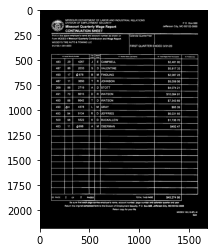

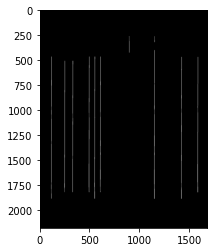

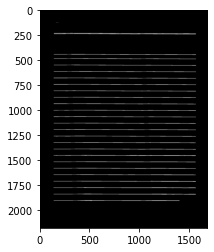

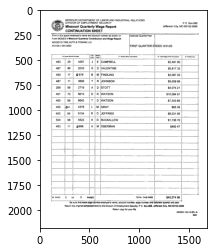

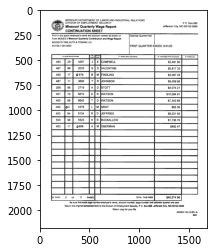

[[117, 1845, 428, 61], [551, 1846, 591, 60], [1148, 1847, 264, 59]]
[[[137, 124, 75, 5]], [[281, 235, 38, 1], [533, 236, 35, 1], [783, 237, 3, 1], [1200, 238, 1, 1], [943, 238, 13, 1], [1403, 239, 7, 1]], [[553, 447, 51, 38], [496, 447, 51, 38], [119, 447, 372, 38], [609, 448, 535, 39], [1149, 449, 266, 38], [1420, 450, 158, 38]], [[333, 489, 158, 60], [252, 489, 75, 60], [609, 490, 535, 61], [552, 490, 52, 59], [496, 490, 51, 59], [119, 490, 128, 59], [1149, 492, 266, 60], [1420, 493, 158, 59]], [[252, 553, 75, 61], [552, 554, 52, 60], [495, 554, 52, 60], [332, 554, 158, 59], [119, 554, 128, 60], [609, 555, 535, 61], [1149, 556, 266, 60], [1420, 557, 158, 60]], [[332, 618, 158, 60], [252, 618, 75, 60], [609, 619, 535, 62], [552, 619, 52, 60], [495, 619, 52, 59], [119, 619, 128, 59], [1149, 621, 265, 60], [1419, 622, 159, 60]], [[332, 683, 158, 59], [252, 683, 75, 59], [609, 684, 535, 61], [552, 684, 52, 58], [495, 684, 52, 58], [119, 684, 128, 58], [1149, 686, 265, 59], [1419, 687, 15

In [24]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

#read your file
file=r'/home/vimal/Documents/table_detect_samples/pre/0121023000.jpeg'
img = cv2.imread(file,0)
img.shape

#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#inverting the image 
img_bin = 255-img_bin
cv2.imwrite('/Users/marius/Desktop/cv_inverted.png',img_bin)
#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

# countcol(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("/Users/marius/Desktop/vertical.jpg",vertical_lines)
#Plot the generated image
plotting = plt.imshow(image_1,cmap='gray')
plt.show()

#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("/Users/marius/Desktop/horizontal.jpg",horizontal_lines)
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("/Users/marius/Desktop/img_vh.jpg", img_vh)
bitxor = cv2.bitwise_xor(img,img_vh)
bitnot = cv2.bitwise_not(bitxor)
#Plotting the generated image
plotting = plt.imshow(bitnot,cmap='gray')
plt.show()

# Detect contours for following box detection
contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Sort all the contours by top to bottom.
contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

#Creating a list of heights for all detected boxes
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]

#Get mean of heights
mean = np.mean(heights)

#Create list box to store all boxes in  
box = []
# Get position (x,y), width and height for every contour and show the contour on image
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        box.append([x,y,w,h])
        
plotting = plt.imshow(image,cmap='gray')
plt.show()

#Creating two lists to define row and column in which cell is located
row=[]
column=[]
j=0

#Sorting the boxes to their respective row and column
for i in range(len(box)):    
        
    if(i==0):
        column.append(box[i])
        previous=box[i]    
    
    else:
        if(box[i][1]<=previous[1]+mean/2):
            column.append(box[i])
            previous=box[i]            
            
            if(i==len(box)-1):
                row.append(column)        
            
        else:
            row.append(column)
            column=[]
            previous = box[i]
            column.append(box[i])
            
print(column)
print(row)

#calculating maximum number of cells
countcol = 0
for i in range(len(row)):
    countcol = len(row[i])
    if countcol > countcol:
        countcol = countcol

#Retrieving the center of each column
center = [int(row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]

center=np.array(center)
center.sort()
print(center)
#Regarding the distance to the columns center, the boxes are arranged in respective order

finalboxes = []
for i in range(len(row)):
    lis=[]
    for k in range(countcol):
        lis.append([])
    for j in range(len(row[i])):
        diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        lis[indexing].append(row[i][j])
    finalboxes.append(lis)


#from every single image-based cell/box the strings are extracted via pytesseract and stored in a list
outer=[]
for i in range(len(finalboxes)):
    for j in range(len(finalboxes[i])):
        inner=''
        if(len(finalboxes[i][j])==0):
            outer.append(' ')
        else:
            for k in range(len(finalboxes[i][j])):
                y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                finalimg = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)
                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion, config='--psm 3')
                inner = inner +" "+ out
            outer.append(inner)

#Creating a dataframe of the generated OCR list
arr = np.array(outer)
dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
print(dataframe)
data = dataframe.style.set_properties(align="left")

In [34]:
from tabula import read_pdf
import ssl

In [38]:
path = '/home/vimal/Documents/table_detect_samples/pre/pdf/0782492000.pdf'

In [31]:
try:
    df = read_pdf(path)
    print(df)

    
    
    #except Exception as e:
    #print("Error {}.format(e)")

SyntaxError: unexpected EOF while parsing (<ipython-input-31-30fe88770f03>, line 8)

In [36]:
df = read_pdf(path)
print(df)


'pages' argument isn't specified.Will extract only from page 1 by default.


JavaNotFoundError: `java` command is not found from this Python process.Please ensure Java is installed and PATH is set for `java`

In [37]:
import tabula as tb

In [39]:
df = tb.read_pdf(path)

'pages' argument isn't specified.Will extract only from page 1 by default.


JavaNotFoundError: `java` command is not found from this Python process.Please ensure Java is installed and PATH is set for `java`

In [2]:
pip install docsumo

  Using cached docsumo-0.5.8-py3-none-any.whl (8.1 kB)
You should consider upgrading via the '/home/vimal/Documents/python/cde_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import docsumo

In [4]:
from docsumo import Docsumo

In [5]:
doc = Docsumo()
doc.user_detail_credit_limit()
doc.documents_list()
doc.documents_summary()

NoAPIKey: Either pass apikey or set env `DOCSUMO_API_KEY`

In [ ]:
doc.upload_file("./data/invoice.pdf","invoice")

In [8]:
pip install tabula-py

You should consider upgrading via the '/home/vimal/Documents/python/cde_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from tabula import read_pdf

In [10]:
df = read_pdf('/home/vimal/Documents/table_detect_samples/pre/pdf/0782492000.pdf')

'pages' argument isn't specified.Will extract only from page 1 by default.


JavaNotFoundError: `java` command is not found from this Python process.Please ensure Java is installed and PATH is set for `java`

In [11]:
pip install tabula-py

You should consider upgrading via the '/home/vimal/Documents/python/cde_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install -r requirements.txt -c constraints.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'constraints.txt'
You should consider upgrading via the '/home/vimal/Documents/python/cde_venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [92]:
import os

In [131]:
x=[]
for i in os.listdir('/home/vimal/Documents/priyanka/original/total'):
    x.append(i)


In [132]:
y=[]
for i in os.listdir('/home/vimal/Documents/priyanka/original/Analysis_done'):
    y.append(i)


In [133]:
x

['0582161000.tif',
 '0944677000.tif',
 '0934343000.tif',
 '0917742000.tif',
 '0602249000.tif',
 '0941733000.tif',
 '0577517000.tif',
 '0939081000.tif',
 '0907292000.tif',
 '0579311000.tif',
 '0550823000.tif',
 '0927603000.tif',
 '0603643000.tif',
 '0911682000.tif',
 '0916851000.tif',
 '0507465000.tif',
 '0908475000.tif',
 '0533022001.tif',
 '0566630000.tif',
 '0923615000.tif',
 '0934352000.tif',
 '0624175000.tif',
 '0907279000.tif',
 '0595502000.tif',
 '0576083000.tif',
 '0520794000.tif',
 '0937513000.tif',
 '0507756000.tif',
 '0572732000.tif',
 '0518306000.tif',
 '0914580000.tif',
 '0610799000.tif',
 '0936015000.tif',
 '0609919000.tif',
 '0534386000.tif',
 '0623453000.tif',
 '0923350000.tif',
 '0528880000.tif',
 '0571001000.tif',
 '0931168000.tif',
 '0583794000.tif',
 '0922943000.tif',
 '0925136000.tif',
 '0620899000.tif',
 '0935005001.tif',
 '0927818000.tif',
 '0545257000.tif',
 '0912585001.tif',
 '0596787000.tif',
 '0560556000.tif',
 '0559006000.tif',
 '0517094000.tif',
 '0561889000

In [134]:
y

['0582161000.tif',
 '0944677000.tif',
 '0934343000.tif',
 '0917742000.tif',
 '0941733000.tif',
 '0577517000.tif',
 '0939081000.tif',
 '0907292000.tif',
 '0579311000.tif',
 '0550823000.tif',
 '0927603000.tif',
 '0603643000.tif',
 '0911682000.tif',
 '0916851000.tif',
 '0507465000.tif',
 '0908475000.tif',
 '0533022001.tif',
 '0566630000.tif',
 '0923615000.tif',
 '0934352000.tif',
 '0624175000.tif',
 '0907279000.tif',
 '0595502000.tif',
 '0576083000.tif',
 '0520794000.tif',
 '0937513000.tif',
 '0507756000.tif',
 '0572732000.tif',
 '0518306000.tif',
 '0914580000.tif',
 '0610799000.tif',
 '0936015000.tif',
 '0609919000.tif',
 '0623453000.tif',
 '0923350000.tif',
 '0528880000.tif',
 '0571001000.tif',
 '0931168000.tif',
 '0583794000.tif',
 '0922943000.tif',
 '0925136000.tif',
 '0620899000.tif',
 '0935005001.tif',
 '0927818000.tif',
 '0545257000.tif',
 '0912585001.tif',
 '0596787000.tif',
 '0560556000.tif',
 '0559006000.tif',
 '0517094000.tif',
 '0561889000.tif',
 '0929686000.tif',
 '0604883000

In [136]:
a=[]
for i in x:
    if i not in y:
        a.append(i)
        print(i)

0602249000.tif
0534386000.tif
0535210000.tif
0922347000.tif
0922312000.tif
0933352000.tif
0928627000.tif
0617609000.tif
0916064000.tif
0617438000.tif
0938578000.tif
0944663000.tif
0922359000.tif
0933350000.tif
0922377000.tif
0592085000.tif
0933381000.tif
0536109000.tif
0607704000.tif
0944662000.tif
0944676000.tif
0498650000.tif
0922237000.tif
0591728000.tif
0939177000.tif
0607630000.tif
0607663000.tif
0944661000.tif
0939179000.tif
0607512000.tif
0498755000.tif
0938531000.tif
0939168000.tif
0939173000.tif


In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [17]:
filename = '/home/vimal/Documents/table_detect_samples/pre/0782492000.jpeg'
img =cv.imread(cv.samples.findFile(filename))
cImage = np.copy(img)

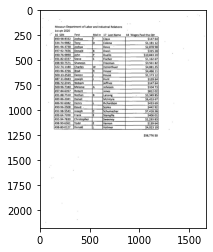

In [18]:
plt.imshow(img)

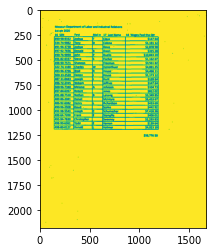

In [19]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

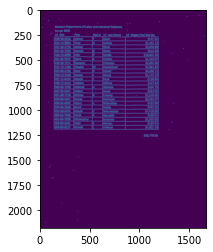

In [20]:
canny = cv.Canny(gray,50,150)
plt.imshow(canny)

In [21]:
rho = 1
theta = np.pi/180
threshold = 50
minLinLength = 350
maxLineGap = 6

linesP = cv.HoughLinesP(canny,rho,theta,threshold,None,minLinLength,maxLineGap)

In [23]:
def is_vertical(line):
    return line[0] == line[2]
def is_horizontal(line):
    return line[1] == line[3]
horizontal_lines = []
vertical_lines = []

if linesP is not None:
    for i in range(0,len(linesP)):
        l = linesP[i][0]
        
        if (is_vertical(l)):
            vertical_lines.append(l)
        elif (is_horizontal(l)):
            horizontal_lines.append(l)

for i , line in enumerate(horizontal_lines):
    cv.line(cImage,(line[0],line[1]),(line[2],line[3]),(0,255,0),3,cv.LINE_AA)

In [26]:
plt.matshow('with_line',cImage)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [42]:
im = '/home/vimal/Documents/table_detect_samples/pre/0782492000.jpeg'
    
import cv2
import pytesseract

image = cv2.imread(im)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 2)
    
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, (0,0,0), 3)
    
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
dilate = cv2.dilate(thresh, kernel, iterations=2)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 500:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

# Bitwise-and to reconstruct image
result = cv2.bitwise_and(image, image, mask=dilate)
result[dilate==0] = (255,255,255)

data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
print(data)

Missour! Department of Labor and Industrial Relations

1st qtr 2020

16 SSN First Mid In 17 Last Name 18 Wages Paid this Qtr
‘490-98-8332 Joshua (Claus $147 641
1334-74-9882 ‘Tony (D (Colona $1,181 12!
1491-96-3738 Joshua IDavis $2,878 98}
1497-92-7656 Donald IB [Dixon $315 28}
+490-76-9890 John [Duello $10,843 201
‘491-82-6337 ‘Steve |Fischer $1,162 67!
‘498-90-7571 ‘Shannon \Freeman $3,561 82!
!322-74-1180 (Charles ‘Ww |Hinterthuer $4,881.35)
‘493-96-3766 (Brad IR !House~ $4,466 111
'500-13-2520 [Easton (House $1,173 12!
‘487-11-0443 Joseph (Hunt $139 641
‘496-72-2315  'Willam Jeffries $147 641
!500-96-7340 IMelante iA Johnson $104 73}
:497-84-6357  |Robert Jones $812 02!
(491-88-7510 (Nathan (B ILansing $3,349 85)
‘489-86-2041 [Daniel IMcIntyre $6,453 67!
‘486-92-6042_ |Henry IRichardson $433 691
‘490-96-2508 David ‘Scoles $442 92!
‘492-98-5543 .Joseph ‘Schumacher $7,418.38)
‘499-64-7200 |Frank ‘Stempfle $406 011
‘493-94-7830 (Christopher iSweeney $2,293 83}
‘498-90-6361 ‘Todd ‘Vern

In [43]:
type(data)

str

In [44]:
d = io.StringIO(data)
df1 = pd.read_csv(data, sep=" ")

OSError: [Errno 36] File name too long: "Missour! Department of Labor and Industrial Relations\n\n1st qtr 2020\n\n16 SSN First Mid In 17 Last Name 18 Wages Paid this Qtr\n‘490-98-8332 Joshua (Claus $147 641\n1334-74-9882 ‘Tony (D (Colona $1,181 12!\n1491-96-3738 Joshua IDavis $2,878 98}\n1497-92-7656 Donald IB [Dixon $315 28}\n+490-76-9890 John [Duello $10,843 201\n‘491-82-6337 ‘Steve |Fischer $1,162 67!\n‘498-90-7571 ‘Shannon \\Freeman $3,561 82!\n!322-74-1180 (Charles ‘Ww |Hinterthuer $4,881.35)\n‘493-96-3766 (Brad IR !House~ $4,466 111\n'500-13-2520 [Easton (House $1,173 12!\n‘487-11-0443 Joseph (Hunt $139 641\n‘496-72-2315  'Willam Jeffries $147 641\n!500-96-7340 IMelante iA Johnson $104 73}\n:497-84-6357  |Robert Jones $812 02!\n(491-88-7510 (Nathan (B ILansing $3,349 85)\n‘489-86-2041 [Daniel IMcIntyre $6,453 67!\n‘486-92-6042_ |Henry IRichardson $433 691\n‘490-96-2508 David ‘Scoles $442 92!\n‘492-98-5543 .Joseph ‘Schumacher $7,418.38)\n‘499-64-7200 |Frank ‘Stempfle $406 011\n‘493-94-7830 (Christopher iSweeney $2,293 83}\n‘498-90-6361 ‘Todd ‘Vernon $139 64)\n‘498-80-0127 |Donald Vollmer $4,023 19)\n\n$56,776 SO\n\x0c"

In [36]:
from io import StringIO

In [40]:
import io
import pandas as pd

In [45]:
import re
from io import StringIO

In [46]:
df = pd.read_csv(StringIO(re.sub(r'[-+|]', '', data)), sep='\s{2,}', engine='python')
print(df)

ParserError: Expected 1 fields in line 19, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [47]:
TESTDATA = StringIO(data)

In [50]:
TESTDATA

In [49]:
df = pd.read_csv(TESTDATA, sep=" ")

ParserError: Error tokenizing data. C error: Expected 7 fields in line 5, saw 13


In [3]:
def parse_tif(filePath):
    img = Image.open(filePath)
    no_of_pages = img.n_frames
    for i in range (0, no_of_pages - 1):
        img.seek(i)
        img.save('/home/rathna/Documents/image/640756000'+'-'+i+'.jpeg')

In [16]:
filePath = '/home/vimal/Downloads/0102551000.tif'

In [8]:
from PIL import Image

In [12]:
img = Image.open(filePath)
no_of_pages = img.n_frames
for i in range (0, no_of_pages - 1):
    img.seek(i)
    img.save('/home/vimal/Documents/table_detect_samples/out'+'-'+i+'.jpeg')

TypeError: can only concatenate str (not "int") to str

In [10]:
no_of_pages

5

In [18]:
def parse_tif(filePath):
    img = Image.open(filePath)
    no_of_pages = img.n_frames
    for i in range (0, no_of_pages - 1):
        try:
            img.seek(i)
            img.save('/home/vimal/Documents/table_detect_samples/out'+'-'+i+'.jpeg')
        except:
            EOFError#end of file error

In [2]:
filePath = '/home/vimal/Downloads/0102551000.tif'

In [20]:
parse_tif(filePath)

In [23]:
img = Image.open(filePath)
no_of_pages = img.n_frames
for i in range (0, no_of_pages - 1):
    try:
        img.seek(i)
        img.save('/home/vimal/Documents/table_detect_samples/out'+'-'+i+'.jpeg')
    except:
        EOFError#end of file error

In [4]:
from PIL import Image

img = Image.open(filePath)
no_of_pages = img.n_frames

for i in range(no_of_pages+1):
    try:
        img.seek(i)
        img.save('/home/vimal/Documents/table_detect_samples/out/tif_out/0102551000_%s.jpeg'%(i,))
    except EOFError:
        break

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sample=r'/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg'
read_image= cv2.imread(sample,0)

In [2]:
    import cv2
    import pytesseract

    image = cv2.imread('/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
    detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(thresh, [c], -1, (0,0,0), 2)
    
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
    detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(thresh, [c], -1, (0,0,0), 3)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
    dilate = cv2.dilate(thresh, kernel, iterations=2)
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        area = cv2.contourArea(c)
        if area < 500:
            cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

    # Bitwise-and to reconstruct image
    result = cv2.bitwise_and(image, image, mask=dilate)
    result[dilate==0] = (255,255,255)

    data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
    print(data)

Missour! Department of Labor and Industrial Relations

1st qtr 2020

16 SSN First Mid In 17 Last Name 18 Wages Paid this Qtr
‘490-98-8332 Joshua (Claus $147 641
1334-74-9882 ‘Tony (D (Colona $1,181 12!
1491-96-3738 Joshua IDavis $2,878 98}
1497-92-7656 Donald IB [Dixon $315 28}
+490-76-9890 John [Duello $10,843 201
‘491-82-6337 ‘Steve |Fischer $1,162 67!
‘498-90-7571 ‘Shannon \Freeman $3,561 82!
!322-74-1180 (Charles ‘Ww |Hinterthuer $4,881.35)
‘493-96-3766 (Brad IR !House~ $4,466 111
'500-13-2520 [Easton (House $1,173 12!
‘487-11-0443 Joseph (Hunt $139 641
‘496-72-2315  'Willam Jeffries $147 641
!500-96-7340 IMelante iA Johnson $104 73}
:497-84-6357  |Robert Jones $812 02!
(491-88-7510 (Nathan (B ILansing $3,349 85)
‘489-86-2041 [Daniel IMcIntyre $6,453 67!
‘486-92-6042_ |Henry IRichardson $433 691
‘490-96-2508 David ‘Scoles $442 92!
‘492-98-5543 .Joseph ‘Schumacher $7,418.38)
‘499-64-7200 |Frank ‘Stempfle $406 011
‘493-94-7830 (Christopher iSweeney $2,293 83}
‘498-90-6361 ‘Todd ‘Vern

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sample=r'/home/vimal/Documents/table_detect_samples/samples/0782492000.jpeg'
read_image= cv2.imread(sample,0)

In [1]:
import math
import os
import sys

import cv2
import numpy as np
import pytesseract

def main(image_file, tess_args):
    """
    OCR the image and output the text to a file with an extension that is ready
    to be used in Tesseract training (.gt.txt).
    Tries to crop the image so that only the relevant text gets passed to Tesseract.
    Returns the name of the text file that contains the text.
    """
    directory, filename = os.path.split(image_file)
    filename_sans_ext, ext = os.path.splitext(filename)
    image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    cropped = crop_to_text(image)
    ocr_data_dir = os.path.join(directory, "ocr_data")
    os.makedirs(ocr_data_dir, exist_ok=True)
    out_imagepath = os.path.join(ocr_data_dir, filename)
    out_txtpath = os.path.join(ocr_data_dir, "{}.gt.txt".format(filename_sans_ext))
    cv2.imwrite(out_imagepath, cropped)
    if not tess_args:
        d = os.path.dirname(sys.modules["table_ocr"].__file__)
        tessdata_dir = os.path.join(d, "tessdata")
        tess_args = ["--psm", "7", "-l", "table-ocr", "--tessdata-dir", tessdata_dir]
    txt = ocr_image(cropped, " ".join(tess_args))
    with open(out_txtpath, "w") as txt_file:
        txt_file.write(txt)
    return out_txtpath
def crop_to_text(image):
    MAX_COLOR_VAL = 255
    BLOCK_SIZE = 15
    SUBTRACT_FROM_MEAN = -2

    img_bin = cv2.adaptiveThreshold(
        ~image,
        MAX_COLOR_VAL,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY,
        BLOCK_SIZE,
        SUBTRACT_FROM_MEAN,
    )

    img_h, img_w = image.shape
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(img_w * 0.5), 1))
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, int(img_h * 0.7)))
    horizontal_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, horizontal_kernel)
    vertical_lines = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, vertical_kernel)
    both = horizontal_lines + vertical_lines
    cleaned = img_bin - both

    # Get rid of little noise.
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
    opened = cv2.dilate(opened, kernel)

    contours, hierarchy = cv2.findContours(opened, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    bounding_rects = [cv2.boundingRect(c) for c in contours]
    NUM_PX_COMMA = 6
    MIN_CHAR_AREA = 5 * 9
    char_sized_bounding_rects = [(x, y, w, h) for x, y, w, h in bounding_rects if w * h > MIN_CHAR_AREA]
    if char_sized_bounding_rects:
        minx, miny, maxx, maxy = math.inf, math.inf, 0, 0
        for x, y, w, h in char_sized_bounding_rects:
            minx = min(minx, x)
            miny = min(miny, y)
            maxx = max(maxx, x + w)
            maxy = max(maxy, y + h)
        x, y, w, h = minx, miny, maxx - minx, maxy - miny
        cropped = image[y:min(img_h, y+h+NUM_PX_COMMA), x:min(img_w, x+w)]
    else:
        # If we morphed out all of the text, assume an empty image.
        cropped = MAX_COLOR_VAL * np.ones(shape=(20, 100), dtype=np.uint8)
    bordered = cv2.copyMakeBorder(cropped, 5, 5, 5, 5, cv2.BORDER_CONSTANT, None, 255)
    return bordered
def ocr_image(image, config):
    return pytesseract.image_to_string(
        image,
        config=config
    )

In [4]:
image_file = '/home/vimal/Documents/table_detect_samples/pre/crop_images/0103841000.jpeg'
tess_args = '/home/vimal/Documents/table_detect_samples/pre/crop_images/0103841000.jpeg'


In [5]:
main(image_file, tess_args)

'/home/vimal/Documents/table_detect_samples/pre/crop_images/ocr_data/0103841000.gt.txt'

In [11]:
def text_files_to_csv(files):
    """Files must be sorted lexicographically
    Filenames must be <row>-<colum>.txt.
    000-000.txt
    000-001.txt
    001-000.txt
    etc...
    """
    rows = []
    for f in files:
        directory, filename = os.path.split(f)
        with open(f) as of:
            txt = of.read().strip()
        row, column = map(int, filename.split(".")[0].split("-"))
        if row == len(rows):
            rows.append([])
        rows[row].append(txt)

    csv_file = io.StringIO()
    writer = csv.writer(csv_file)
    writer.writerows(rows)
    return csv_file.getvalue()

def main(files):
    return text_files_to_csv(files)

In [12]:
file_path = '/home/vimal/Documents/table_detect_samples/pre/crop_images/ocr_data/fff/'
files = os.listdir(file_path)

In [14]:
main(files)

FileNotFoundError: [Errno 2] No such file or directory: '000-000.txt'

In [16]:
import pandas as pd
  
# readinag given csv file
# and creating dataframe
dataframe1 = pd.read_csv("/home/vimal/Documents/table_detect_samples/pre/crop_images/ocr_data/fff/000-000.txt")
  
# storing this dataframe in a csv file
x=dataframe1.to_csv('000-000.csv', 
                  index = None)

In [22]:
import pandas as pd
  
# readinag given csv file
# and creating dataframe
dataframe1 = pd.read_csv("text5.txt")
  
# storing this dataframe in a csv file
x=dataframe1.to_csv('000-001.csv', 
                  index = None)

In [23]:
import pandas as pd
  
# readinag given csv file
# and creating dataframe
dataframe1 = pd.read_csv("text2.txt")
  
# storing this dataframe in a csv file
x=dataframe1.to_csv('000-002.csv', 
                  index = None)

In [35]:
rows = []
for f in files:
    print(f)
    directory, filename = os.path.split(f)
    with open(os.path.join(path,f)) as of:
        txt = of.read().strip()
        print(txt)
        row, column = map(int, filename.split(".")[0].split("-"))
        print(row)
        if row == len(rows):
            rows.append([])
rows[row].append(txt)
print(rows)    
 
csv_file = io.StringIO()
writer = csv.writer(csv_file)
writer.writerows(rows)
#return csv_file.getvalue()


001-000.txt
334-74-9882
1
003-001.txt
Donald
3
000-001.txt
Joshua
0
001-001.txt

1
002-003.txt
Davis
2
000-003.txt
Claus
0
001-002.txt

1
000-000.txt
490-98-8332
0
002-004.txt
$2,878 98
2
001-003.txt
Colona
1
000-004.txt
$147 64
0
002-002.txt

2
003-004.txt
$315 28
3
000-002.txt

0
003-003.txt
Dixon
3
002-001.txt
Joshua
2
001-004.txt
$1,181 12
1
002-000.txt
491-96-3738
2
003-002.txt

3
003-000.txt
497-92-7656
3
[[], [], [], ['497-92-7656']]


In [33]:
len(rows)

4

In [91]:
files =  os.listdir('/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data')
#print(files)
sorted_files =  sorted(files)
print(sorted_files)

['000-000.txt', '000-001.txt', '000-002.txt', '000-003.txt', '000-004.txt', '001-000.txt', '001-001.txt', '001-002.txt', '001-003.txt', '001-004.txt', '002-000.txt', '002-001.txt', '002-002.txt', '002-003.txt', '002-004.txt', '003-000.txt', '003-001.txt', '003-002.txt', '003-003.txt', '003-004.txt']


In [88]:
for f in files:
    print(f)
    sort = sorted(f)
print(sort)

001-000.txt
003-001.txt
000-001.txt
001-001.txt
002-003.txt
000-003.txt
001-002.txt
000-000.txt
002-004.txt
001-003.txt
000-004.txt
002-002.txt
003-004.txt
000-002.txt
003-003.txt
002-001.txt
001-004.txt
002-000.txt
003-002.txt
003-000.txt
['-', '.', '0', '0', '0', '0', '0', '3', 't', 't', 'x']


In [94]:
rows = []
for f in files:
    print(f)
    directory, filename = os.path.split(f)
    with open(os.path.join(path,f)) as of:
        txt = of.read().strip()
        print(txt)
        row, column = map(int, filename.split(".")[0].split("-"))
        print(row)
        if row == len(rows):
            rows.append([])
            rows[row].append(txt)
            print(rows)

 
csv_file = io.StringIO()
writer = csv.writer(csv_file)
writer.writerows(rows)
#return csv_file.getvalue()


001-000.txt
334-74-9882
1
003-001.txt
Donald
3
000-001.txt
Joshua
0
[['Joshua']]
001-001.txt

1
[['Joshua'], ['']]
002-003.txt
Davis
2
[['Joshua'], [''], ['Davis']]
000-003.txt
Claus
0
001-002.txt

1
000-000.txt
490-98-8332
0
002-004.txt
$2,878 98
2
001-003.txt
Colona
1
000-004.txt
$147 64
0
002-002.txt

2
003-004.txt
$315 28
3
[['Joshua'], [''], ['Davis'], ['$315 28']]
000-002.txt

0
003-003.txt
Dixon
3
002-001.txt
Joshua
2
001-004.txt
$1,181 12
1
002-000.txt
491-96-3738
2
003-002.txt

3
003-000.txt
497-92-7656
3


In [72]:
import csv
import io
import os


def text_files_to_csv(files):
    """Files must be sorted lexicographically
    Filenames must be <row>-<colum>.txt.
    000-000.txt
    000-001.txt
    001-000.txt
    etc...
    """
    rows = []
    for f in files:
        directory, filename = os.path.split(f)
        with open(os.path.join(path,f)) as of:
            txt = of.read().strip()
            #print(txt)
            row, column = map(int, filename.split(".")[0].split("-"))
            if row == len(rows):
                rows.append([])
    rows[row].append(txt)

    csv_file = io.StringIO()
    writer = csv.writer(csv_file)
    writer.writerows(rows)
    print(rows)
    return csv_file.getvalue()

def main(files):
    return text_files_to_csv(files)

In [73]:
file_path = '/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data'
files = os.listdir(file_path)

In [74]:
text_files_to_csv(files)

[[], [], [], ['497-92-7656']]


'\r\n\r\n\r\n497-92-7656\r\n'

In [75]:
print(txt)

497-92-7656


In [76]:
main(files)

[[], [], [], ['497-92-7656']]


'\r\n\r\n\r\n497-92-7656\r\n'

In [80]:
import glob

import os
filepath = '/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data'

file_list = glob.glob(os.path.join(filepath, "*.txt"))

corpus = []

for file_path in file_list:

    with open(file_path) as f_input:

        corpus.append(f_input.read())

corpus

['334-74-9882\n\x0c',
 'Donald\n\x0c',
 'Joshua\n\x0c',
 '\x0c',
 'Davis\n\x0c',
 'Claus\n\x0c',
 '\x0c',
 '490-98-8332\n\x0c',
 '$2,878 98\n\x0c',
 'Colona\n\x0c',
 '$147 64\n\x0c',
 '\x0c',
 '$315 28\n\x0c',
 '\x0c',
 'Dixon\n\x0c',
 'Joshua\n\x0c',
 '$1,181 12\n\x0c',
 '491-96-3738\n\x0c',
 '\x0c',
 '497-92-7656\n\x0c']

In [78]:
type(corpus)

list

In [79]:
import csv
file = open('g4g.csv', 'w+', newline ='')
  
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerows(corpus)

In [ ]:
text_file = open("df_text.txt", "wt")
n = text_file.write(x)
text_file.close()

In [55]:
import argparse
import os

from table_ocr.ocr_to_csv import text_files_to_csv

In [57]:
parser = argparse.ArgumentParser()
parser.add_argument("files", nargs="+")

_StoreAction(option_strings=[], dest='files', nargs='+', const=None, default=None, type=None, choices=None, help=None, metavar=None)

In [60]:
def main(files):
    print(text_files_to_csv(files))


if __name__ == "__main__":
    args = parser.parse_args()
    files = args.files
    files.sort()
    #main(files)

usage: ipykernel_launcher.py [-h] files [files ...]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

In [59]:
print(row)

3


In [12]:
path = '/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data'
for f in files:
        directory, filename = os.path.split(f)
        #print(filename)
        #print(f)
        with open(os.path.join(path,f)) as of:
            print(of)


<_io.TextIOWrapper name='/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-000.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/003-001.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/000-001.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-001.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/002-003.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/000-003.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-002.txt' mode='r' encoding='UTF-8'>

In [83]:
for infile in sorted(glob.glob('/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/*.txt')):
    print ( infile)


/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/000-000.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/000-001.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/000-002.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/000-003.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/000-004.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-000.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-001.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-002.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-003.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/001-004.txt
/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/002-000.txt
/home/vima

In [95]:
myFiles = r'/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data/'
outputFile = r'/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/output.csv'

exporter = FileCsvExport(directory = myFiles, output = outputFile, header = ['SSN', 'FIRST','mid','LAST','WAGES'], file_mask = '.txt')
if exporter.export():
    print(f"Export complete. Total rows: {exporter.rows}.")

NameError: name 'FileCsvExport' is not defined

In [96]:
import os
import csv

dirpath = '/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data'
output = 'output145_file.csv'
with open(output, 'w') as outfile:
    csvout = csv.writer(outfile)
    csvout.writerow(['SSN', 'FIRST','mid','LAST','WAGES'])

    files = os.listdir(dirpath)

    for filename in files:
        with open(dirpath + '/' + filename) as afile:
            csvout.writerow([filename, afile.read()])
            afile.close()

    outfile.close()

In [97]:
import glob
import os
import pandas as pd

file_list = glob.glob(os.path.join("/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data", "*.txt"))

corpus = []

for file_path in file_list:
    with open(file_path, encoding="latin-1") as f_input:
        corpus.append(f_input.read())

df = pd.DataFrame({'col':corpus})
print (df)

               col
0   334-74-9882\n
1        Donald\n
2        Joshua\n
3                
4         Davis\n
5         Claus\n
6                
7   490-98-8332\n
8     $2,878 98\n
9        Colona\n
10      $147 64\n
11               
12      $315 28\n
13               
14        Dixon\n
15       Joshua\n
16    $1,181 12\n
17  491-96-3738\n
18               
19  497-92-7656\n


In [122]:
def text_files_to_csv(files):
    """Files must be sorted lexicographically
    Filenames must be <row>-<colum>.txt.
    000-000.txt
    000-001.txt
    001-000.txt
    etc...
    """
    rows = []
    for f in files:
        directory, filename = os.path.split(f)
        with open(os.path.join(path,f)) as of:
            txt = of.read().strip()
        row, column = map(int, filename.split(".")[0].split("-"))
        if row == len(rows):
            rows.append([])
        rows[row].append(txt)

    csv_file = io.StringIO()
    writer = csv.writer(csv_file)
    writer.writerows(rows)
    return csv_file.getvalue()

def main(files):
    return text_files_to_csv(files)

In [123]:
file_path = '/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data'
file = os.listdir(file_path)
files = sorted(file)

In [124]:
x = (main(files))

In [125]:
type(x)

str

In [126]:
print(x)

490-98-8332,Joshua,,Claus,$147 64
334-74-9882,,,Colona,"$1,181 12"
491-96-3738,Joshua,,Davis,"$2,878 98"
497-92-7656,Donald,,Dixon,$315 28



In [107]:
text_file = open("/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/text/out_text.txt", "wt")
n = text_file.write(x)
text_file.close()

In [114]:
import pandas as pd

df = pd.read_csv('/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/text/out_text.txt',header=None)
#df = df.dropna(how='all', axis=1)
df

,0,1,2,3,4
0,490-98-8332,Joshua,NaN,Claus,$147 64
1,334-74-9882,NaN,NaN,Colona,"$1,181 12"
2,491-96-3738,Joshua,NaN,Davis,"$2,878 98"
3,497-92-7656,Donald,NaN,Dixon,$315 28


In [119]:
file_path = '/home/vimal/Documents/table_detect_samples/unstructured tables/DUMMY/ocr_data'
file = os.listdir(file_path)
files = sorted(file)

In [120]:
x = (main(files))

In [121]:
print(x)

490-98-8332,Joshua,,Claus,$147 64
334-74-9882,,,Colona,"$1,181 12"
491-96-3738,Joshua,,Davis,"$2,878 98"
497-92-7656,Donald,,Dixon,$315 28

